# Linear Regression


In [1]:
import numpy as np

In [2]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


### Gradient Descent

#### Always Check your gradient, before debugging gradient descent,

We know that $$\frac{\partial f}{\partial x}=\frac{f(x+\epsilon)-f(x)}{\epsilon}$$

So always compare the difference between computed gradient using this formula.


#### Lets Check

### Let's generate some random data

In [9]:
X = np.arange(0,5,0.1, dtype=np.float32)
delta = np.random.uniform(-1,1, size=X.shape[0])
Y = .4 * X + 3 + delta

#making a copy for later use
rx = X
ry = Y
#print(X.shape)

Text(0, 0.5, 'Y')

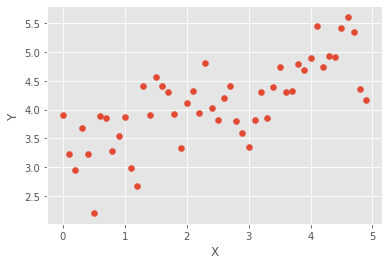

In [10]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

### Let's visualize our solution space

In [11]:
cf=lambda t0,t1,x,y: np.dot(t1*x+t0-y,t1*x+t0-y)
#square error

In [12]:
t0=arange(-5,+5,0.01)
t1=arange(-5,+5,0.01)

In [13]:
ecf=np.zeros((len(t0),len(t1)))

for i in range(len(t0)):
    for j in range(len(t1)):
        ecf[i,j]=cf(t0[i],t1[j],X,Y)

In [14]:
print (ecf)

[[25812.57874018 25749.13141991 25685.76787078 ...  2699.24656377
   2716.40824555  2733.64991275]
 [25791.22274837 25727.79983908 25664.46069352 ...  2702.31745354
   2719.50363319  2736.76980692]
 [25769.87671301 25706.47862907 25643.16419158 ...  2705.39837748
   2722.6090385   2739.8997222 ]
 ...
 [ 9486.02599504  9447.00553029  9408.06772513 ... 10725.91280516
  10767.5017663  10809.1691548 ]
 [ 9474.64005366  9435.6441016   9396.7307847  ... 10738.95392271
  10780.56738514 10822.25927346]
 [ 9463.26428725  9424.29287543  9385.40408531 ... 10752.00479116
  10793.6426213  10835.35914436]]


In [15]:
# Generate theta_0 and theta_1 values for the cost function...
tX, tY = np.meshgrid(t0, t1)
print (tX.shape, tY.shape)

(1000, 1000) (1000, 1000)


In [16]:
print (ecf.shape)

(1000, 1000)


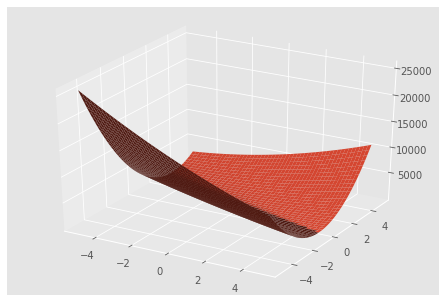

In [17]:
#Plot the cost function...
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(tX,tY,ecf.T)
# ax.set_xlabel(r'$\theta_0$(Intercept)')
# ax.set_ylabel(r'$\theta_1$(Slope)')
# ax.set_zlabel(r'$J(\theta_0,\theta_1)$(Cost Function)')

### Time for our regression implementation

$$
h(X, \theta) = X^T . \theta
$$

In [18]:
def hyp(theta, X):
    res = np.dot(X,theta)
    return res

$$
cost = \frac{1}{2m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)}^2
$$

In [19]:
def cost_function(theta,X,Y):
    res1 = np.dot(X,theta)
    res2 = np.sum(np.square(res1-Y))
    cost = res2/(2*X.shape[0])
    return cost

$$
\frac{\delta}{\delta \theta_j} = \frac{1}{m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)} * X_j
$$

In [20]:
def derivative_cost_function(theta,X,Y):
    nexamples=float(X.shape[0])
    hypothesis = hyp(theta,X)
    cost = hypothesis - Y
    cost = np.dot(X.transpose() , cost)
    cost = cost / nexamples
    return cost

In [21]:
print (X.shape)
nx=np.hstack((X,ones(len(X),)))
nx=nx.reshape((2,X.shape[0])).T
print (nx.shape)

(50,)
(50, 2)


In [22]:
np.random.seed(20) # To make sure you have the same value as me
eps=0.0001
nexamples=float(nx.shape[0])
thetas=np.random.rand(nx.shape[1],)
print (thetas)

[0.5881308  0.89771373]


In [23]:
cf=cost_function(thetas,nx,Y)
print (cf)

1.7477746257195674


In [24]:
ad=derivative_cost_function(thetas,nx,Y)
print (ad)

[-3.85716919 -1.77204614]


In [25]:
#Gradient Descent...
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxniter=20000):
    nexamples=float(X.shape[0])
    thetas=rand(X.shape[1],)
    
    eps=0.00001
    alpha=0.01
    cf=[]
    numiter=0
    
    for i in range(maxniter):
        temp = thetas
        thetas = thetas - (alpha * derivative_cost_function(thetas,X,Y))
        if(np.sum(abs(temp-thetas)) <= eps):
            break
    return thetas

In [26]:
theta_new=GradientDescent(nx,Y,cost_function,derivative_cost_function) 
print(theta_new)

[0.35656085 3.23634617]


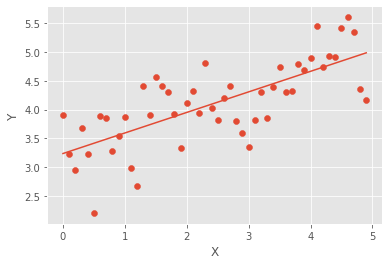

In [27]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(nx[:,0],np.dot(nx,theta_new))